<a href="https://colab.research.google.com/github/RupalJ-02/NoBroker-Hyderabad-Housing-Data-Analysis/blob/main/Price_prediction_on_NoBroker's_Housing_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Replace 'your_file.csv' with the actual filename
file_path = '/content/drive/My Drive/hyd_house_prediction_project/dataset.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   active              19110 non-null  bool   
 1   amenities           18938 non-null  object 
 2   balconies           9574 non-null   float64
 3   bathroom            19110 non-null  int64  
 4   combineDescription  0 non-null      float64
 5   completeStreetName  19108 non-null  object 
 6   deposit             19110 non-null  int64  
 7   facing              9569 non-null   object 
 8   facingDesc          9569 non-null   object 
 9   floor               19110 non-null  int64  
 10  furnishingDesc      19110 non-null  object 
 11  gym                 19110 non-null  bool   
 12  id                  19110 non-null  object 
 13  isMaintenance       19110 non-null  bool   
 14  lift                19110 non-null  bool   
 15  loanAvailable       19110 non-null  bool   
 16  loca

In [39]:
new_data=df.drop(['amenities','locality','balconies','lift','active','loanAvailable','location','ownerName','parkingDesc',
                  'propertyTitle','propertyType','combineDescription','completeStreetName','facing','facingDesc','furnishingDesc',
                  'gym','id','isMaintenance','weight','waterSupply','swimmingPool','shortUrl','sharedAccomodation','reactivationSource'],axis=1)

In [40]:
print(new_data.parking.value_counts())
print(new_data.bathroom.value_counts())
print(new_data.floor.value_counts())
print(new_data.type_bhk.value_counts())
print(new_data.maintenanceAmount.value_counts())

parking
BOTH            9599
TWO_WHEELER     7430
FOUR_WHEELER    1131
NONE             950
Name: count, dtype: int64
bathroom
2     9852
1     5699
3     3265
4      207
5       54
6       17
7        9
8        3
12       3
14       1
Name: count, dtype: int64
floor
1     4735
2     4678
0     3908
3     2785
4     1424
5      830
6      157
7      113
8       80
9       66
11      54
10      39
12      38
14      35
13      28
18      21
16      18
15      17
20      13
19      13
21      10
17      10
23       9
22       6
25       6
24       6
28       4
29       3
26       2
31       1
30       1
Name: count, dtype: int64
type_bhk
BHK2        9242
BHK3        4229
BHK1        4221
RK1         1149
BHK4         211
BHK4PLUS      58
Name: count, dtype: int64
maintenanceAmount
1000.0    1542
1500.0    1435
2000.0    1132
500.0     1069
1200.0     442
          ... 
3060.0       1
775.0        1
5300.0       1
3604.0       1
875.0        1
Name: count, Length: 263, dtype: int64


In [41]:
new_data.replace({'parking':{'BOTH':0,'TWO_WHEELER':1,'FOUR_WHEELER':2,'NONE':3}},inplace=True)
new_data.replace({'type_bhk':{'RK1':0.5,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5}},inplace=True)
new_data.replace({'maintenanceAmount':{'None':int(0)}},inplace=True)

<ipython-input-41-22e61100f6cb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data.replace({'parking':{'BOTH':0,'TWO_WHEELER':1,'FOUR_WHEELER':2,'NONE':3}},inplace=True)
<ipython-input-41-22e61100f6cb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data.replace({'type_bhk':{'RK1':0.5,'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5}},inplace=True)


In [42]:
new_data.head()

,bathroom,deposit,floor,localityId,maintenanceAmount,parking,property_age,property_size,rent_amount,totalFloor,type_bhk
0,3,90000,3,gachibowli_hyderabad,2000.0,0,5,2200,28000,5,3.0
1,2,45000,2,chandrayangutta_hyderabad,NaN,1,1,1200,15000,2,3.0
2,3,80000,0,manikonda_hyderabad,1000.0,0,0,1800,16000,3,3.0
3,2,18000,2,NOT_FOUND,500.0,0,0,750,9000,2,2.0
4,2,80000,2,hitech_city_hyderabad,2000.0,0,5,1250,32500,5,2.0


In [43]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathroom           19110 non-null  int64  
 1   deposit            19110 non-null  int64  
 2   floor              19110 non-null  int64  
 3   localityId         19110 non-null  object 
 4   maintenanceAmount  9452 non-null   float64
 5   parking            19110 non-null  int64  
 6   property_age       19110 non-null  int64  
 7   property_size      19110 non-null  int64  
 8   rent_amount        19110 non-null  int64  
 9   totalFloor         19110 non-null  int64  
 10  type_bhk           19110 non-null  float64
dtypes: float64(2), int64(8), object(1)
memory usage: 1.6+ MB


In [44]:
new_data.isnull().sum()

,0
bathroom,0
deposit,0
floor,0
localityId,0
maintenanceAmount,9658
parking,0
property_age,0
property_size,0
rent_amount,0
totalFloor,0


In [45]:
hd=new_data.copy()

In [46]:
hd['localityId'].value_counts()

,count
localityId,
NOT_FOUND,3491
kondapur_hyderabad,1338
kukatpally_hyderabad,1146
miyapur_hyderabad,721
hafeezpet_hyderabad,663
...,...
east_bahadurpura_hyderabad,1
komaram_bheem_colony_hyderabad,1
yakutpura_hyderabad,1


In [47]:
hd['maintenance'] = pd.to_numeric(hd['maintenanceAmount'], errors='coerce').fillna(0).astype(int)
hd.head()

,bathroom,deposit,floor,localityId,maintenanceAmount,parking,property_age,property_size,rent_amount,totalFloor,type_bhk,maintenance
0,3,90000,3,gachibowli_hyderabad,2000.0,0,5,2200,28000,5,3.0,2000
1,2,45000,2,chandrayangutta_hyderabad,NaN,1,1,1200,15000,2,3.0,0
2,3,80000,0,manikonda_hyderabad,1000.0,0,0,1800,16000,3,3.0,1000
3,2,18000,2,NOT_FOUND,500.0,0,0,750,9000,2,2.0,500
4,2,80000,2,hitech_city_hyderabad,2000.0,0,5,1250,32500,5,2.0,2000


In [48]:
hd1=hd.drop(['maintenanceAmount','deposit','property_age','totalFloor'],axis=1)
hd1.head()
hd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathroom       19110 non-null  int64  
 1   floor          19110 non-null  int64  
 2   localityId     19110 non-null  object 
 3   parking        19110 non-null  int64  
 4   property_size  19110 non-null  int64  
 5   rent_amount    19110 non-null  int64  
 6   type_bhk       19110 non-null  float64
 7   maintenance    19110 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 1.2+ MB


Feature Engineering

In [49]:
hd2=hd1.copy()
hd2['rent_per_sqft']=hd2['rent_amount']/hd2['property_size']
hd2.head()

,bathroom,floor,localityId,parking,property_size,rent_amount,type_bhk,maintenance,rent_per_sqft
0,3,3,gachibowli_hyderabad,0,2200,28000,3.0,2000,12.727273
1,2,2,chandrayangutta_hyderabad,1,1200,15000,3.0,0,12.500000
2,3,0,manikonda_hyderabad,0,1800,16000,3.0,1000,8.888889
3,2,2,NOT_FOUND,0,750,9000,2.0,500,12.000000
4,2,2,hitech_city_hyderabad,0,1250,32500,2.0,2000,26.000000


In [50]:
location_stats=hd2.groupby('localityId')['localityId'].agg('count').sort_values(ascending=False)
location_stats

,localityId
localityId,
NOT_FOUND,3491
kondapur_hyderabad,1338
kukatpally_hyderabad,1146
miyapur_hyderabad,721
hafeezpet_hyderabad,663
...,...
maharaja_ranjeet_singh_nagar_hyderabad,1
majeedpur_hyderabad,1
chanchalguda_hyderabad,1


In [51]:
len(location_stats[location_stats<=10])

119

In [52]:
location_less_than_10=location_stats[location_stats<=10]
location_less_than_10

,localityId
localityId,
bairagiguda_hyderabad,10
nampally_hyderabad,10
kanchan_bagh_hyderabad,10
koti_hyderabad,10
auto_nagar_hyderabad,10
...,...
maharaja_ranjeet_singh_nagar_hyderabad,1
majeedpur_hyderabad,1
chanchalguda_hyderabad,1


In [53]:
hd2.localityId=hd2.localityId.apply(lambda x:'NOT_FOUND' if x  in location_less_than_10 else x)
hd2['localityId'].value_counts()

,count
localityId,
NOT_FOUND,3988
kondapur_hyderabad,1338
kukatpally_hyderabad,1146
miyapur_hyderabad,721
hafeezpet_hyderabad,663
...,...
sri_nagar_colony_hyderabad,11
tukaram_gate_hyderabad,11
gurram_guda_hyderabad,11


outlier detection

In [54]:
hd2[hd2.property_size/hd2.type_bhk<300]

,bathroom,floor,localityId,parking,property_size,rent_amount,type_bhk,maintenance,rent_per_sqft
582,1,0,serilingampally_hyderabad,1,100,5000,0.5,0,50.000000
647,1,1,miyapur_hyderabad,1,144,5500,0.5,0,38.194444
706,1,1,NOT_FOUND,3,100,4000,0.5,0,40.000000
719,2,6,NOT_FOUND,0,0,25000,2.0,2500,inf
734,1,1,NOT_FOUND,0,120,10000,0.5,1000,83.333333
...,...,...,...,...,...,...,...,...,...
18845,1,5,hafeezpet_hyderabad,0,500,8000,2.0,720,16.000000
18846,1,0,padmarao_nagar_hyderabad,1,250,5000,1.0,500,20.000000
18937,1,2,ramachandra_puram_hyderabad,1,200,8000,1.0,0,40.000000
18977,2,1,nallagandla_hyderabad,0,400,15000,2.0,550,37.500000


In [55]:
hd2.shape

(19110, 9)

In [56]:
hd3=hd2[~(hd2.property_size/hd2.type_bhk<300)]
hd3.shape

(18761, 9)

In [57]:
hd3.rent_per_sqft.describe()

,rent_per_sqft
count,18761.000000
mean,14.520746
std,6.085518
min,0.000000
25%,10.666667
50%,13.500000
75%,17.000000
max,120.000000


In [58]:
def remove_pps_outliers (df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('localityId'):
        m=np.mean(subdf.rent_per_sqft)
        st=np.std(subdf.rent_per_sqft)
        reduced_df=subdf[(subdf.rent_per_sqft>(m-st))&(subdf.rent_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
hd4=remove_pps_outliers(hd3)
hd4.shape

(14819, 9)

Text(0.5, 1.0, 'distribution of data')

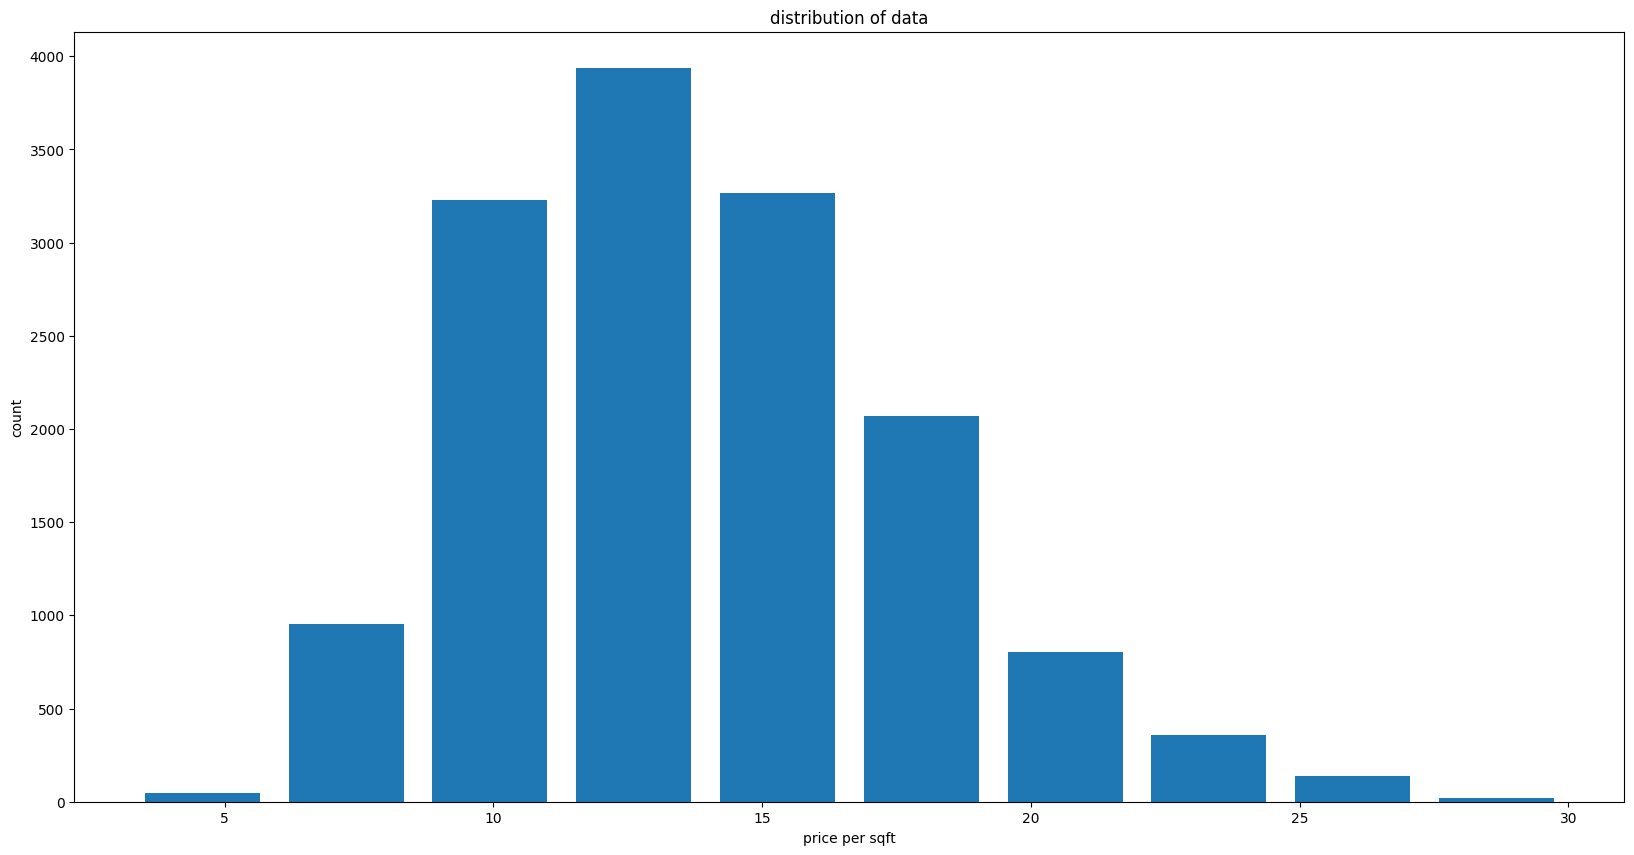

In [59]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

mpl.rcParams['figure.figsize']=(20,10)
plt.hist(hd4.rent_per_sqft,rwidth=0.8)
plt.xlabel('price per sqft')
plt.ylabel('count')
plt.title('distribution of data')

In [60]:
hd4.bathroom.unique()

array([2, 3, 1, 4, 5, 7, 8, 6])

In [61]:
hd4[hd4.bathroom>hd4.type_bhk+1]

,bathroom,floor,localityId,parking,property_size,rent_amount,type_bhk,maintenance,rent_per_sqft
308,7,0,NOT_FOUND,1,3600,36000,5.0,2000,10.000000
611,5,0,NOT_FOUND,0,2750,35000,3.0,6000,12.727273
619,3,2,NOT_FOUND,3,400,7000,1.0,100,17.500000
641,2,0,NOT_FOUND,1,400,3500,0.5,0,8.750000
1160,8,0,NOT_FOUND,0,3800,40000,5.0,0,10.526316
1571,5,4,NOT_FOUND,0,2680,45000,3.0,7000,16.791045
1975,7,0,NOT_FOUND,0,6200,55000,4.0,4000,8.870968
2061,2,1,NOT_FOUND,0,1150,22000,0.5,0,19.130435
2117,5,10,NOT_FOUND,2,3265,60000,3.0,8000,18.376723
2805,5,8,NOT_FOUND,0,2800,40000,3.0,7000,14.285714


In [62]:
hd5=hd4[hd4.bathroom<=hd4.type_bhk+1]
hd5.shape

(14789, 9)

In [63]:
hd6=hd5.drop('rent_per_sqft',axis=1)
hd6.head()

,bathroom,floor,localityId,parking,property_size,rent_amount,type_bhk,maintenance
0,2,2,NOT_FOUND,1,1200,15000,3.0,0
1,2,2,NOT_FOUND,0,750,9000,2.0,500
2,2,2,NOT_FOUND,0,1000,9500,2.0,0
3,3,0,NOT_FOUND,0,1800,21000,3.0,1000
4,1,1,NOT_FOUND,1,900,10500,1.0,500


one hot encoding

In [64]:
dummies=pd.get_dummies(hd6.localityId)
dummies.head()

,NOT_FOUND,adikmet_hyderabad,almasguda_hyderabad,amberpet_hyderabad,ameerpet_hyderabad,attapur_hyderabad,badangpet_hyderabad,badesahebguda_hyderabad,balakampet_hyderabad,balanagar_hyderabad,...,turkayamjal_hyderabad,uppal_hyderabad,upparpally_hyderabad,venkat_nagar_colony_hyderabad,west_marredpally_hyderabad,whisper_valley_hyderabad,yapral_hyderabad,yella_reddy_guda_hyderabad,yousufguda_hyderabad,zamistanpur_hyderabad
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
hd7=pd.concat([hd6.drop('localityId',axis='columns'),dummies.drop('NOT_FOUND',axis='columns')],axis='columns')
hd7.head()

,bathroom,floor,parking,property_size,rent_amount,type_bhk,maintenance,adikmet_hyderabad,almasguda_hyderabad,amberpet_hyderabad,...,turkayamjal_hyderabad,uppal_hyderabad,upparpally_hyderabad,venkat_nagar_colony_hyderabad,west_marredpally_hyderabad,whisper_valley_hyderabad,yapral_hyderabad,yella_reddy_guda_hyderabad,yousufguda_hyderabad,zamistanpur_hyderabad
0,2,2,1,1200,15000,3.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2,0,750,9000,2.0,500,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2,0,1000,9500,2.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,0,0,1800,21000,3.0,1000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1,1,900,10500,1.0,500,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
X=hd7.drop('rent_amount',axis='columns')
Y=hd7['rent_amount']

model

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=10)

In [68]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.8584606265176853

In [69]:
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import cross_val_score
cv = ShuffleSplit (n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression (),X,Y,cv=cv)

array([0.86122198, 0.86125557, 0.86355815, 0.86479628, 0.84904104])

In [70]:
X.columns

Index(['bathroom', 'floor', 'parking', 'property_size', 'type_bhk',
       'maintenance', 'adikmet_hyderabad', 'almasguda_hyderabad',
       'amberpet_hyderabad', 'ameerpet_hyderabad',
       ...
       'turkayamjal_hyderabad', 'uppal_hyderabad', 'upparpally_hyderabad',
       'venkat_nagar_colony_hyderabad', 'west_marredpally_hyderabad',
       'whisper_valley_hyderabad', 'yapral_hyderabad',
       'yella_reddy_guda_hyderabad', 'yousufguda_hyderabad',
       'zamistanpur_hyderabad'],
      dtype='object', length=155)

In [71]:
def predict_price(localityId,bathroom,floor,parking,property_size,type_bhk,maintenance):

    loc_index = np.where(X.columns==localityId)[0][0]
    x= np.zeros(len(X.columns))
    x[0]=bathroom
    x[1]=floor
    x[2]=parking
    x[3]=property_size
    x[4]=type_bhk
    x[5]=maintenance

    if loc_index>=0:
        x[loc_index]=1

    return lr.predict([x])[0]

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
#localityId,bathroom,floor,parking,property_size,type_bhk,maintenance

In [76]:
predict_price('yella_reddy_guda_hyderabad',2,3,0,800,2,1000)

13315.0257041928

In [78]:
predict_price('serilingampally_hyderabad',2,3,0,800,3,1000)

13320.358678436178